In [14]:
from cryoS2Sdrop.analyze import *

PARENT_PATH = setup.PARENT_PATH

pd.options.display.float_format = "{:,.6f}".format
pd.set_option('display.max_columns', 50)

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Gaussian + Poisson noise 

## Model 8

In [18]:
tomo_list = [
    'tomoPhantom_model8_noisyGaussPoissVL',
    'tomoPhantom_model8_noisyGaussPoissL',
    'tomoPhantom_model8_noisyGaussPoissM',
    'tomoPhantom_model8_noisyGaussPoissH'
]
exp_name = "realBernoulli_volMask_comparison"

data_log = []

for tomo in tomo_list:
    if exp_name=="realBernoulliGPPnoise_dropoutLevel_comparison":
        tomo+='_Perlin'
        
    logdir = 'data/S2SDenoising/model_logs/%s/%s/' %(tomo, exp_name)
    logdir = os.path.join(PARENT_PATH, logdir)

    _data_log = logdir_to_dataframe(logdir, clip_values=True)
    data_log.append(_data_log)

data_log = pd.concat(data_log)
data_log = data_log.reset_index().drop('index', 1)
data_log.head()

model    version             dataset TV_alpha  \
0  realBernoulli_volMask_comparison  version_0  singleCET_dataset         0   
1  realBernoulli_volMask_comparison  version_1  singleCET_dataset         0   
2  realBernoulli_volMask_comparison  version_0  singleCET_dataset         0   
3  realBernoulli_volMask_comparison  version_1  singleCET_dataset         0   
4  realBernoulli_volMask_comparison  version_0  singleCET_dataset         0   

                      Version_comment     transform  full_tomo_psnr  \
0    Volumetric mask(0.3) with prob=1  {'p': '0.5'}       20.148006   
1  Volumetric mask(0.3) with prob=0.5  {'p': '0.5'}       18.979057   
2    Volumetric mask(0.3) with prob=1  {'p': '0.5'}       19.739700   
3  Volumetric mask(0.3) with prob=0.5  {'p': '0.5'}       19.015287   
4    Volumetric mask(0.3) with prob=1  {'p': '0.5'}       19.544762   

   full_tomo_ssim  baseline_psnr  baseline_ssim  \
0        0.185681       7.551045       0.035820   
1        0.157667       7.551045       0.035820   
2        0.175407       6.709743       0.025137   
3        0.156496       6.709743       0.025137   
4        0.162583       6.378741       0.019156   

                                           tomo_path  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
4  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   

                                        gt_tomo_path use_deconv_as_target  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
4  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   

  predict_simRecon use_deconv_data    p  n2v_psnr  n2v_ssim  \
0             null           false  0.5 17.397554  0.118766   
1             null           false  0.5 17.397554  0.118766   
2             null           false  0.5 14.856593  0.083857   
3             null           false  0.5 14.856593  0.083857   
4             null           false  0.5  8.315987  0.026238   

   baseline_psnr_best  baseline_ssim_best  ssim_vs_baseline  \
0            7.551045            0.035820        418.371203   
1            7.551045            0.035820        340.162868   
2            6.709743            0.025137        597.792291   
3            6.709743            0.025137        522.560863   
4            6.378741            0.019156        748.747375   

   n2v_ssim_vs_baseline  psnr_vs_baseline  n2v_psnr_vs_baseline  \
0            231.561836        166.824083            130.399296   
1            231.561836        151.343456            130.399296   
2            233.595494        194.194601            121.418229   
3            233.595494        183.398167            121.418229   
4             36.974383        206.404701             30.370349   

            noise_level tomo_name  \
0  Gauss(0.2) + Poisson     blobs   
1  Gauss(0.2) + Poisson     blobs   
2  Gauss(0.5) + Poisson     blobs   
3  Gauss(0.5) + Poisson     blobs   
4  Gauss(1.0) + Poisson     blobs   

                                           pred_path  
0  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
1  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
2  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
3  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
4  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...

index                             model    version             dataset  \
0      0  realBernoulli_volMask_comparison  version_0  singleCET_dataset    
1      2  realBernoulli_volMask_comparison  version_0  singleCET_dataset    
2      4  realBernoulli_volMask_comparison  version_0  singleCET_dataset    
3      6  realBernoulli_volMask_comparison  version_0  singleCET_dataset    

  TV_alpha                   Version_comment     transform  full_tomo_psnr  \
0        0  Volumetric mask(0.3) with prob=1  {'p': '0.5'}       20.148006   
1        0  Volumetric mask(0.3) with prob=1  {'p': '0.5'}       19.739700   
2        0  Volumetric mask(0.3) with prob=1  {'p': '0.5'}       19.544762   
3        0  Volumetric mask(0.3) with prob=1  {'p': '0.5'}       17.910009   

   full_tomo_ssim  baseline_psnr  baseline_ssim  \
0        0.185681       7.551045       0.035820   
1        0.175407       6.709743       0.025137   
2        0.162583       6.378741       0.019156   
3        0.186640       6.052643       0.010709   

                                           tomo_path  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   

                                        gt_tomo_path use_deconv_as_target  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   

  predict_simRecon use_deconv_data    p  n2v_psnr  n2v_ssim  \
0             null           false  0.5 17.397554  0.118766   
1             null           false  0.5 14.856593  0.083857   
2             null           false  0.5  8.315987  0.026238   
3             null           false  0.5  5.402924  0.009138   

   baseline_psnr_best  baseline_ssim_best  ssim_vs_baseline  \
0            7.551045            0.035820        418.371203   
1            6.709743            0.025137        597.792291   
2            6.378741            0.019156        748.747375   
3            6.052643            0.010709      1,642.773462   

   n2v_ssim_vs_baseline  psnr_vs_baseline  n2v_psnr_vs_baseline  \
0            231.561836        166.824083            130.399296   
1            233.595494        194.194601            121.418229   
2             36.974383        206.404701             30.370349   
3            -14.675521        195.903930            -10.734471   

            noise_level tomo_name  \
0  Gauss(0.2) + Poisson     blobs   
1  Gauss(0.5) + Poisson     blobs   
2  Gauss(1.0) + Poisson     blobs   
3  Gauss(5.0) + Poisson     blobs   

                                           pred_path  
0  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
1  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
2  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
3  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...

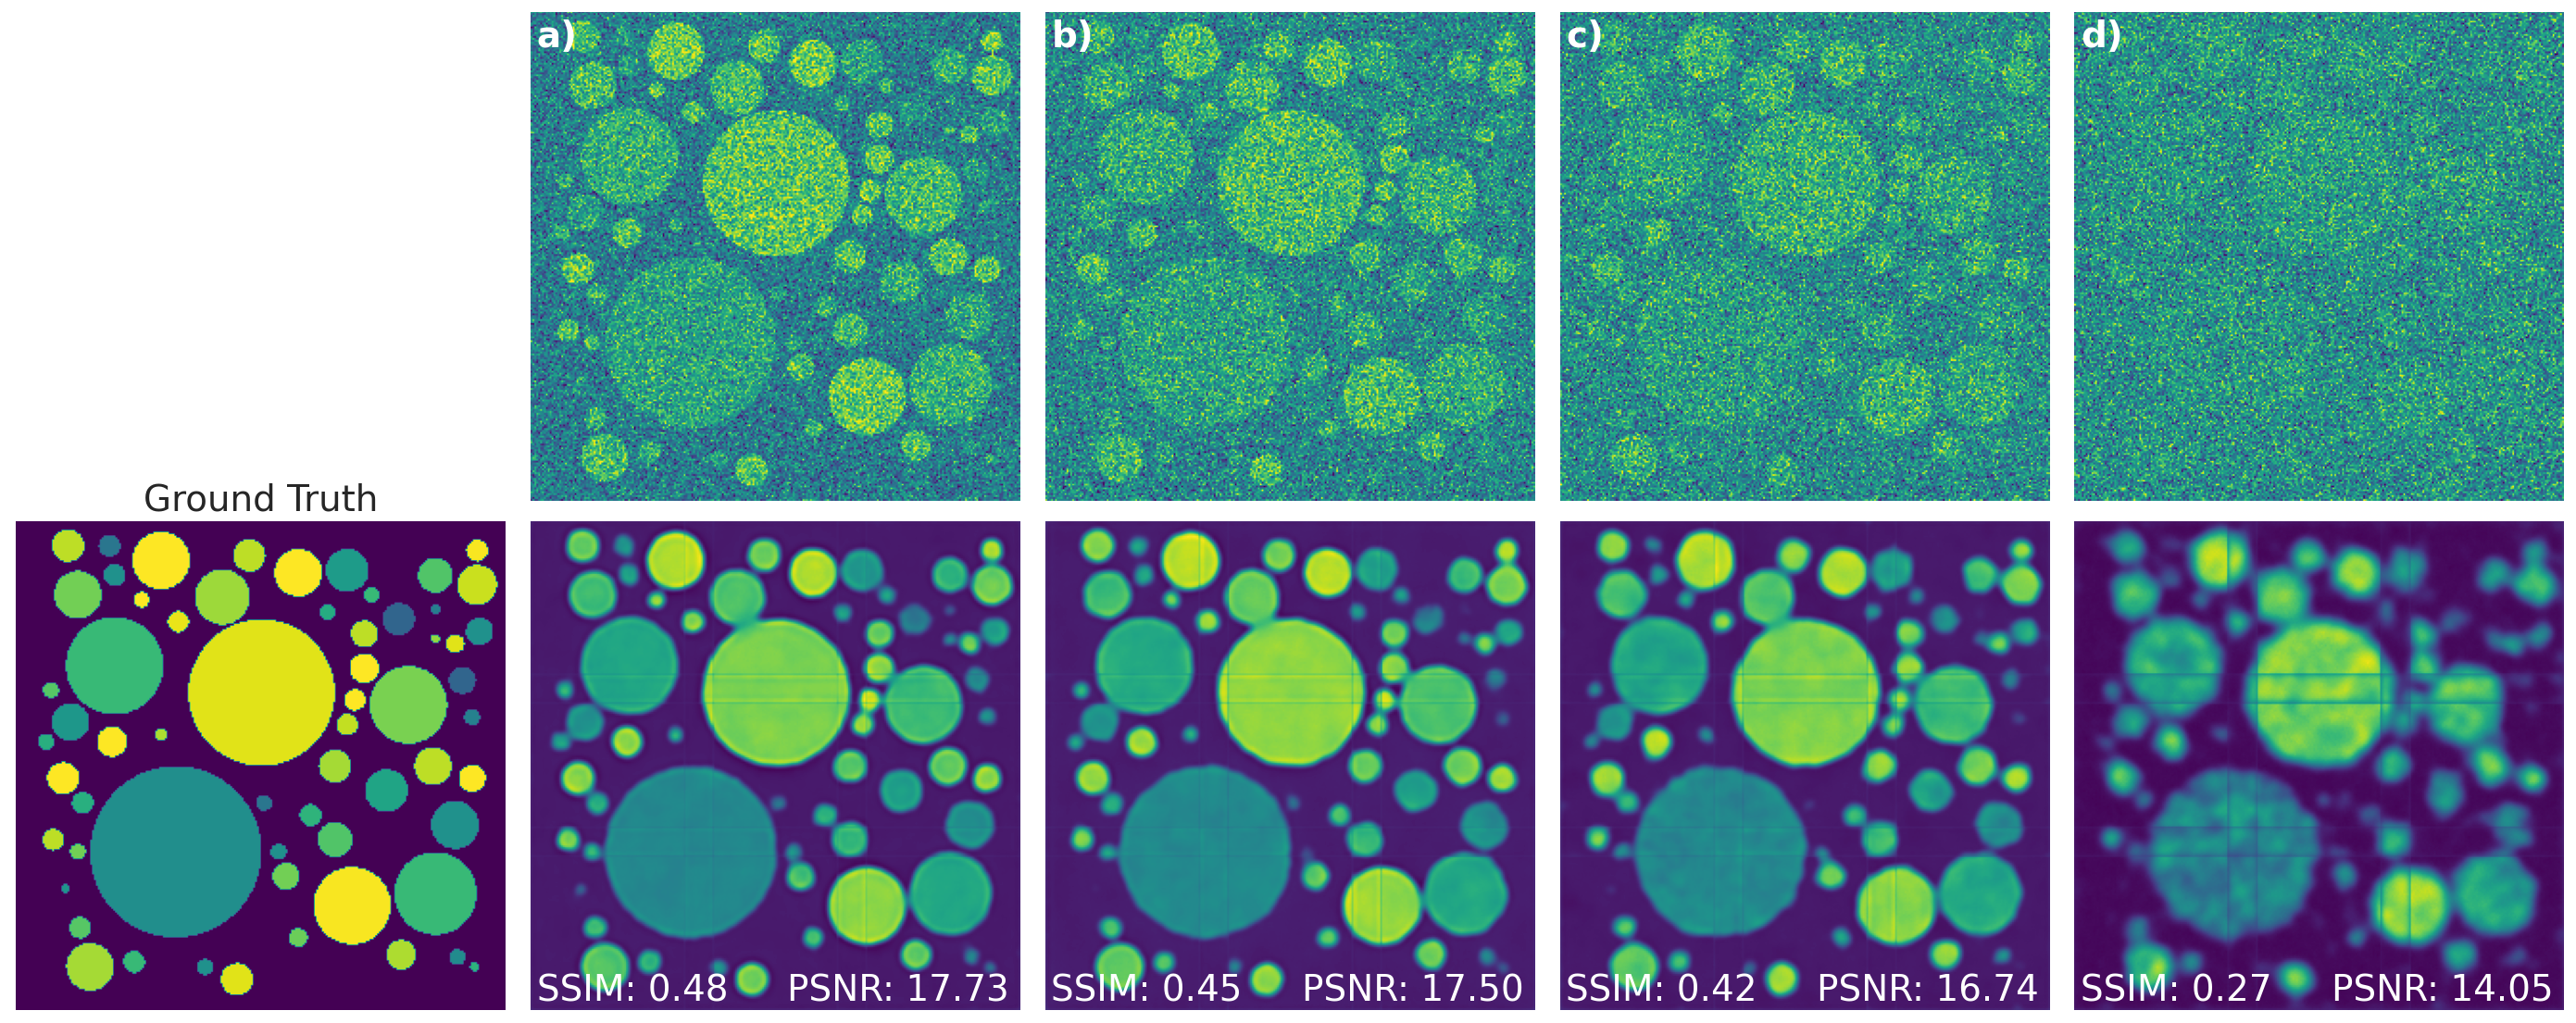

In [19]:
idx = data_log.groupby(['noise_level'])['full_tomo_ssim'].transform(max) == data_log['full_tomo_ssim']

df = data_log[idx].reset_index()

display(df)

fig, ax = plt.subplots(2, len(df)+1, figsize=(20, 8), dpi=140)
list(map(lambda axi: axi.set_axis_off(), ax.ravel()))
plt.tight_layout()

for i, row in df.iterrows():
    gt = read_array(row.gt_tomo_path)
    gt = standardize(clip(gt))
    gt = scale(gt)
    noisy = read_array(row.tomo_path)
    noisy = standardize(clip(noisy))
    noisy = scale(noisy)
    denoised = read_array(row.pred_path)
    denoised = scale(denoised)
    
    zidx = len(gt)//2
    
    # print(row.pred_path, '\n')
    
    ax[1][0].imshow(gt[zidx], vmin=0, vmax=1)
    ax[1][0].set_title('Ground Truth', size=20)
    ax_noisy = ax[0][i+1]
    ax_denoised = ax[1][i+1]
    ax_noisy.imshow(noisy[zidx], vmin=0, vmax=1)
    ax_denoised.imshow(denoised[zidx], vmin=0, vmax=1)
    
    _ssim = ssim(torch.tensor(gt[zidx]).unsqueeze(0).unsqueeze(0),
                 torch.tensor(denoised[zidx]).unsqueeze(0).unsqueeze(0), 
                 data_range=1)
    
    _psnr = peak_signal_noise_ratio(torch.tensor(gt[zidx]).unsqueeze(0).unsqueeze(0),
                 torch.tensor(denoised[zidx]).unsqueeze(0).unsqueeze(0), 
                 data_range=1)
    
    ax_noisy.text(0.0125, 0.93, string.ascii_lowercase[i]+')', transform=ax_noisy.transAxes, size=20, weight='bold', color='white')
    ax_denoised.text(0.0125, 0.02, 'SSIM: %.02f' %float(_ssim), transform=ax_denoised.transAxes, size=20, color='white')
    ax_denoised.text(0.5+2*0.0125, 0.02, 'PSNR: %.02f' %float(_psnr), transform=ax_denoised.transAxes, size=20, color='white')

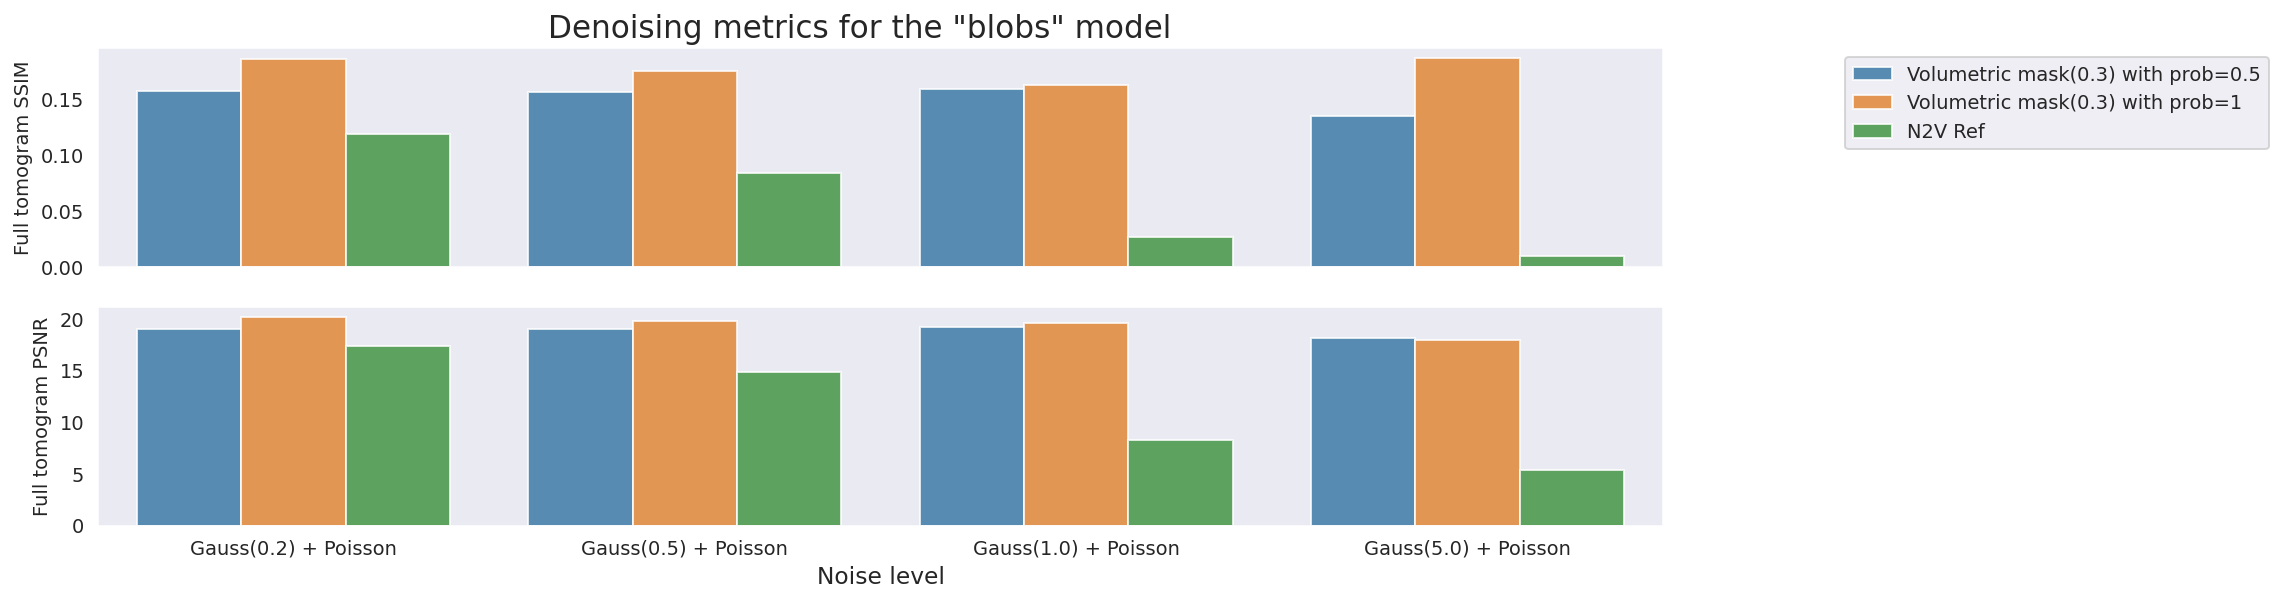

In [20]:
df = data_log.groupby(['noise_level', 'Version_comment'])['full_tomo_ssim', 'full_tomo_psnr'].mean().reset_index()

df2 = data_log.groupby(['noise_level'])['n2v_ssim', 'n2v_psnr'].mean().reset_index()
df2['Version_comment'] = 'N2V Ref'
df2 = df2[['noise_level', 'Version_comment', 'n2v_ssim', 'n2v_psnr']]
df2.columns = ['noise_level', 'Version_comment', 'full_tomo_ssim', 'full_tomo_psnr']

df = pd.concat([df, df2])

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, dpi=140)

plt.tight_layout()
name = data_log.gt_tomo_path.unique()[0].split('/')[-1].replace('.mrc', '')

if name == 'tomoPhantom_model14':
    name = '"cell" model'
if name == 'tomoPhantom_model16':
    name = '"spaceship" model'
if name == 'tomoPhantom_model8':
    name = '"blobs" model'
    
plt.suptitle('Denoising metrics for the %s' %name, y=1.01)

sns.barplot(data=df, hue='Version_comment', y='full_tomo_ssim', x='noise_level', ax=ax0, alpha=0.8)
ax0.set_xlabel('')
ax0.legend(bbox_to_anchor=(1.11, 1))

sns.barplot(data=df, hue='Version_comment', y='full_tomo_psnr', x='noise_level', ax=ax1, alpha=0.8)
ax1.set_xlabel('Noise level')

ax0.set_ylabel('Full tomogram SSIM', fontsize=10)
ax1.set_ylabel('Full tomogram PSNR', fontsize=10)
ax1.get_legend().remove()